In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year-10,now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000
2015-05-26,29.030584,29.767437,28.918601,29.698008,282790400
2015-05-27,29.572577,29.621849,29.126885,29.191834,183332800
2015-05-28,29.514349,29.552423,29.362053,29.532267,122933200
2015-05-29,29.178402,29.440443,29.093293,29.391170,203538000
...,...,...,...,...,...
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000
2015-05-26,29.030584,29.767437,28.918601,29.698008,282790400
2015-05-27,29.572577,29.621849,29.126885,29.191834,183332800
2015-05-28,29.514349,29.552423,29.362053,29.532267,122933200
2015-05-29,29.178402,29.440443,29.093293,29.391170,203538000


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900
2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600
2025-05-21,202.089996,207.039993,200.710007,205.169998,59134800


# 2. Data Exploration & Visualization

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2515, 5)

In [7]:
df.isna().sum() #Contamos cuantos valores nulos existen en cada columna

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe() #Describe nuestro dataframe dando un primer vistazo estadistico

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,101.454384,102.470564,100.321809,101.354510,1.109635e+08
std,68.551353,69.222456,67.778831,68.469081,6.457099e+07
min,20.647457,20.951431,20.448617,20.569748,2.323470e+07
25%,37.549988,37.888619,37.140320,37.516717,6.792910e+07
50%,78.215118,78.601524,77.121762,77.993338,9.517960e+07
75%,161.478638,163.271029,159.303167,160.922103,1.347576e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000
2015-05-26,29.030584,29.767437,28.918601,29.698008,282790400
2015-05-27,29.572577,29.621849,29.126885,29.191834,183332800
2015-05-28,29.514349,29.552423,29.362053,29.532267,122933200
2015-05-29,29.178402,29.440443,29.093293,29.391170,203538000


In [11]:
df = df.reset_index()

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000
1,2015-05-26,29.030584,29.767437,28.918601,29.698008,282790400
2,2015-05-27,29.572577,29.621849,29.126885,29.191834,183332800
3,2015-05-28,29.514349,29.552423,29.362053,29.532267,122933200
4,2015-05-29,29.178402,29.440443,29.093293,29.391170,203538000


Text(0, 0.5, 'Close Price')

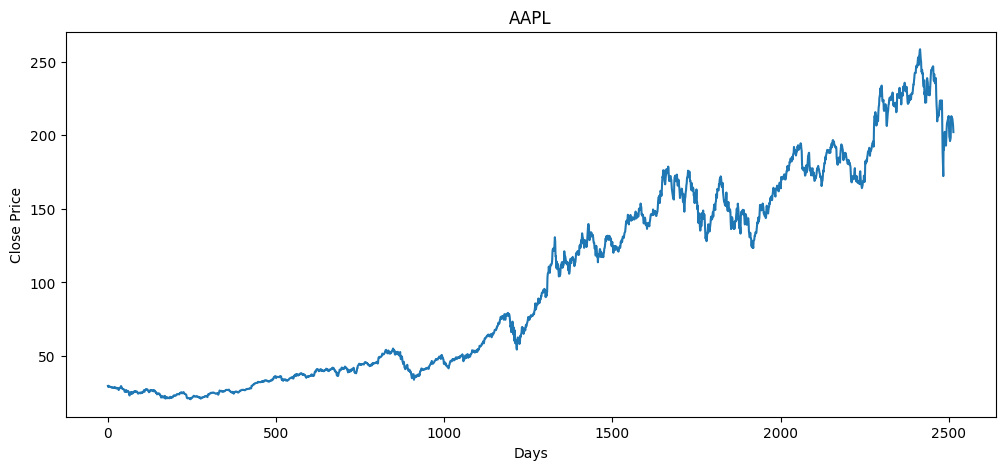

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3. Feature Engineering

In [14]:
# Ejemplo de como seria la logica para calcular el promedio de movimientos.

# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA(Moving Average) de 5 días: null null null null 30 40... 
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[1:6])/5)

40.0


In [15]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [16]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


## 100 days Moving Average

In [17]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000,NaN
1,2015-05-26,29.030584,29.767437,28.918601,29.698008,282790400,NaN
2,2015-05-27,29.572577,29.621849,29.126885,29.191834,183332800,NaN
3,2015-05-28,29.514349,29.552423,29.362053,29.532267,122933200,NaN
4,2015-05-29,29.178402,29.440443,29.093293,29.391170,203538000,NaN


In [18]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000,NaN
1,2015-05-26,29.030584,29.767437,28.918601,29.698008,282790400,NaN
2,2015-05-27,29.572577,29.621849,29.126885,29.191834,183332800,NaN
3,2015-05-28,29.514349,29.552423,29.362053,29.532267,122933200,NaN
4,2015-05-29,29.178402,29.440443,29.093293,29.391170,203538000,NaN
...,...,...,...,...,...,...,...
98,2015-10-12,25.107832,25.366560,25.071836,25.362061,121868800,NaN
99,2015-10-13,25.150583,25.299070,24.900855,24.932352,132197200,26.870891
100,2015-10-14,24.795113,25.089837,24.648875,25.038092,177849600,26.821997


Text(0, 0.5, 'Price')

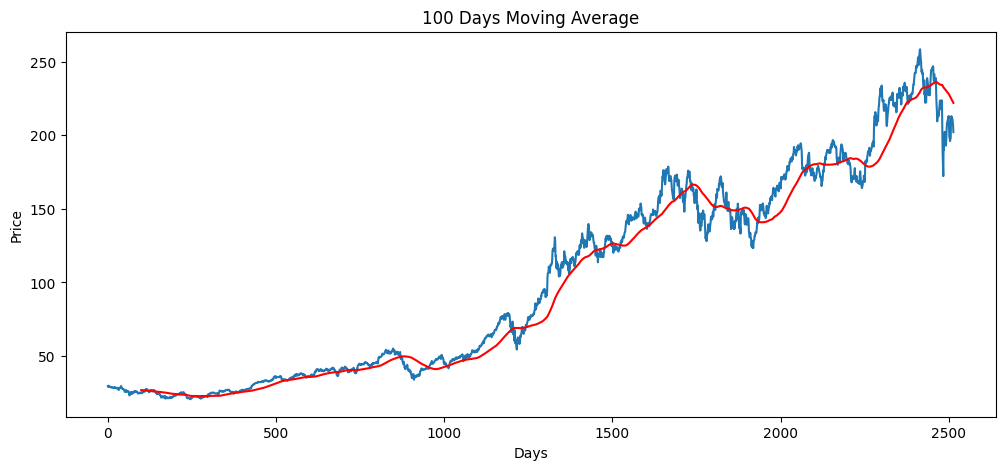

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')


## 200 days Moving Average

In [20]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000,NaN,NaN
1,2015-05-26,29.030584,29.767437,28.918601,29.698008,282790400,NaN,NaN
2,2015-05-27,29.572577,29.621849,29.126885,29.191834,183332800,NaN,NaN
3,2015-05-28,29.514349,29.552423,29.362053,29.532267,122933200,NaN,NaN
4,2015-05-29,29.178402,29.440443,29.093293,29.391170,203538000,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-03-07,23.141771,23.359854,22.935046,23.259899,143315600,24.232511,NaN
199,2016-03-08,22.950951,23.116785,22.807834,22.894158,126247600,24.210515,25.540703
200,2016-03-09,22.971395,23.075893,22.778300,23.014557,108806800,24.192278,25.507137


Text(0, 0.5, 'Price')

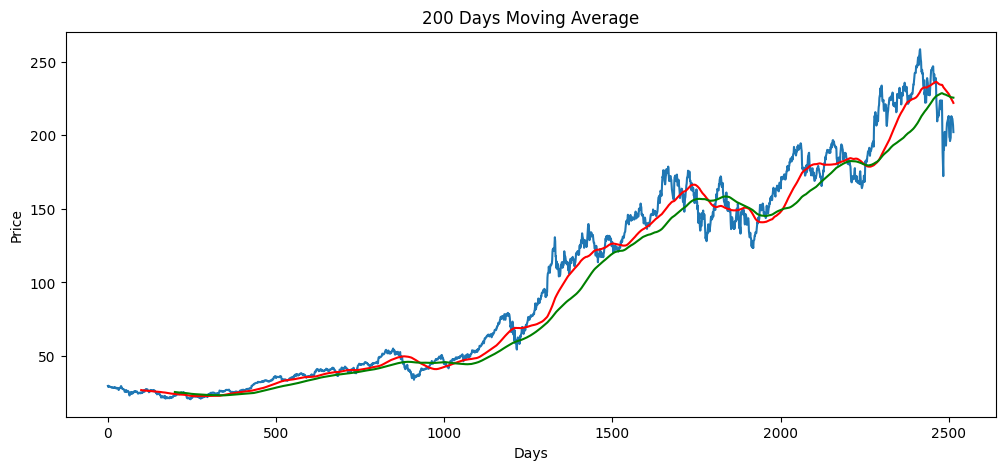

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

## Calculating % changed in each trading session

In [22]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,29.684561,NaN
1,29.030584,-0.022031
2,29.572577,0.018670
3,29.514349,-0.001969
4,29.178402,-0.011382
...,...,...
2510,211.449997,-0.004145
2511,211.259995,-0.000899
2512,208.779999,-0.011739


In [23]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2015-05-22,29.684561,29.780868,29.429239,29.474035,182384000,NaN,NaN,NaN
1,2015-05-26,29.030584,29.767437,28.918601,29.698008,282790400,NaN,NaN,-0.022031
2,2015-05-27,29.572577,29.621849,29.126885,29.191834,183332800,NaN,NaN,0.018670
3,2015-05-28,29.514349,29.552423,29.362053,29.532267,122933200,NaN,NaN,-0.001969
4,2015-05-29,29.178402,29.440443,29.093293,29.391170,203538000,NaN,NaN,-0.011382
...,...,...,...,...,...,...,...,...,...
2510,2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500,223.790494,225.722362,-0.004145
2511,2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900,223.411205,225.689754,-0.000899
2512,2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500,222.960229,225.628423,-0.011739


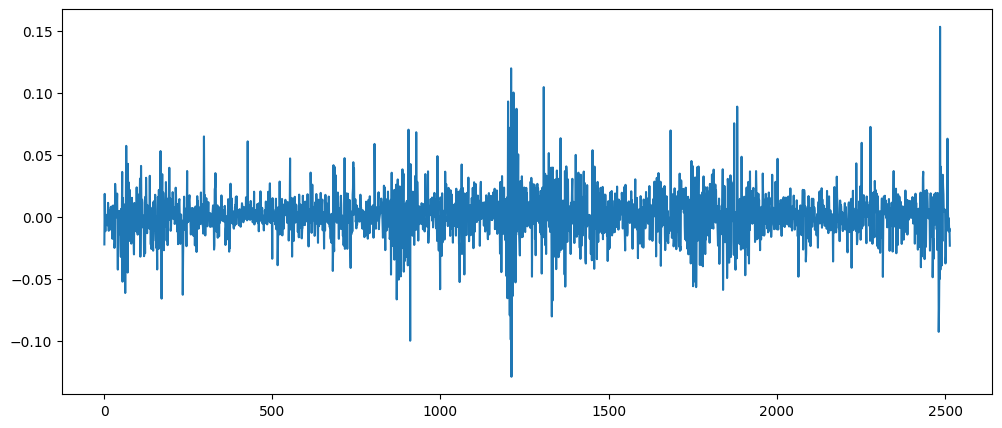

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])


# 4. Data Preprocessing

In [25]:
df.shape

(2515, 9)

In [26]:
# Dividiendo la data en dos partes, entrenamiento(70%) y testing(30%)

data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

In [27]:
data_training


Ticker,AAPL
0,29.684561
1,29.030584
2,29.572577
3,29.514349
4,29.178402
...,...
1755,144.186783
1756,140.308960
1757,144.787155
1758,143.241959


In [28]:
data_testing

Ticker,AAPL
1760,138.596436
1761,135.181229
1762,135.417465
1763,140.850311
1764,138.143723
...,...
2510,211.449997
2511,211.259995
2512,208.779999
2513,206.860001


In [29]:
type(data_training)

pandas.core.frame.DataFrame

In [30]:
# Transformando la data para crear una escala entre 0 y 1

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05719751],
       [0.05305837],
       [0.05648874],
       ...,
       [0.78570323],
       [0.77592339],
       [0.79897147]])

In [33]:
type(data_training_array)

numpy.ndarray

In [34]:
data_training_array.shape

(1760, 1)

# 5. Sequence Creation

In [35]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
y_train

array([0.02625128, 0.02860078, 0.02743315, ..., 0.78570323, 0.77592339,
       0.79897147])

In [37]:
x_train

array([[[0.05719751],
        [0.05305837],
        [0.05648874],
        ...,
        [0.02897102],
        [0.02823054],
        [0.02850112]],

       [[0.05305837],
        [0.05648874],
        [0.05612021],
        ...,
        [0.02823054],
        [0.02850112],
        [0.02625128]],

       [[0.05648874],
        [0.05612021],
        [0.05399394],
        ...,
        [0.02850112],
        [0.02625128],
        [0.02860078]],

       ...,

       [[0.92383836],
        [0.9439659 ],
        [0.9604282 ],
        ...,
        [0.83179959],
        [0.78190336],
        [0.7573599 ]],

       [[0.9439659 ],
        [0.9604282 ],
        [0.96440393],
        ...,
        [0.78190336],
        [0.7573599 ],
        [0.78570323]],

       [[0.9604282 ],
        [0.96440393],
        [0.98956355],
        ...,
        [0.7573599 ],
        [0.78570323],
        [0.77592339]]])

In [38]:
x_train.ndim

3

In [39]:
y_train.ndim

1

In [40]:
x_train.shape

(1660, 100, 1)

In [41]:
y_train.shape

(1660,)

In [42]:
# Ejemplo para entender la metodologia del entrenamiento
precios = [10, 20, 30, 40, 50, 60]
x2_train = []
y2_train = []

for i in range(3, len(precios)):
    x2_train.append(precios[i-3:i])  # 3 precios anteriores
    y2_train.append(precios[i])      # el precio actual

In [43]:
x2_train

[[10, 20, 30], [20, 30, 40], [30, 40, 50]]

In [44]:
y2_train

[40, 50, 60]

In [45]:
precios[0:3]

[10, 20, 30]

# 6. Model Building

In [46]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [49]:
# ML Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [50]:
model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # Definimos la cantidad de neuronas que queremos en nuestro modelo.
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model Training

In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0406
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 4.3724e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 5.0847e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 4.3243e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 5.1909e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.6002e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 4.5569e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.0532e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.5784e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.3928e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 4.0655e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.2669e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 3.6342e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 3.5498e-04
Epoch 15/50
52/52 ━

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [54]:
#Guardar el modelo entrenado.
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [60]:
data_training.tail(100)

Ticker,AAPL
1660,173.021545
1661,176.996719
1662,175.975983
1663,176.064285
1664,174.906036
...,...
1755,144.186783
1756,140.308960
1757,144.787155
1758,143.241959


In [59]:
data_testing

Ticker,AAPL
1760,138.596436
1761,135.181229
1762,135.417465
1763,140.850311
1764,138.143723
...,...
2510,211.449997
2511,211.259995
2512,208.779999
2513,206.860001


In [61]:
past_100_days = data_training.tail(100)

In [62]:
past_100_days

Ticker,AAPL
1660,173.021545
1661,176.996719
1662,175.975983
1663,176.064285
1664,174.906036
...,...
1755,144.186783
1756,140.308960
1757,144.787155
1758,143.241959


In [63]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,173.021545
1,176.996719
2,175.975983
3,176.064285
4,174.906036
...,...
850,211.449997
851,211.259995
852,208.779999
853,206.860001


In [64]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.67476513e-01],
       [3.96927609e-01],
       [3.89365219e-01],
       [3.90019432e-01],
       [3.81438248e-01],
       [3.76857177e-01],
       [4.09144212e-01],
       [3.92346425e-01],
       [3.57586904e-01],
       [3.36353315e-01],
       [3.37589502e-01],
       [3.37734996e-01],
       [3.58750401e-01],
       [3.62022820e-01],
       [3.37734996e-01],
       [3.44134115e-01],
       [3.20355461e-01],
       [2.94394969e-01],
       [2.81887605e-01],
       [2.66616654e-01],
       [2.60871634e-01],
       [2.47491761e-01],
       [2.46837210e-01],
       [2.43419523e-01],
       [3.24209290e-01],
       [3.56569014e-01],
       [3.55332601e-01],
       [3.64277010e-01],
       [3.42897928e-01],
       [3.40786405e-01],
       [3.35471309e-01],
       [3.58552340e-01],
       [3.69109614e-01],
       [3.38820602e-01],
       [3.13482442e-01],
       [3.15229835e-01],
       [3.43698877e-01],
       [3.41951710e-01],
       [3.15229835e-01],
       [3.03725665e-01],


In [65]:
input_data.shape

(855, 1)

In [66]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [67]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [68]:
x_test

array([[[0.36747651],
        [0.39692761],
        [0.38936522],
        ...,
        [0.15829479],
        [0.14684681],
        [0.17382621]],

       [[0.39692761],
        [0.38936522],
        [0.39001943],
        ...,
        [0.14684681],
        [0.17382621],
        [0.11242926]],

       [[0.38936522],
        [0.39001943],
        [0.38143825],
        ...,
        [0.17382621],
        [0.11242926],
        [0.08712682]],

       ...,

       [[0.96651929],
        [0.9722842 ],
        [0.99393969],
        ...,
        [0.65870329],
        [0.65218355],
        [0.65077587]],

       [[0.9722842 ],
        [0.99393969],
        [1.        ],
        ...,
        [0.65218355],
        [0.65077587],
        [0.63240219]],

       [[0.99393969],
        [1.        ],
        [0.97464918],
        ...,
        [0.65077587],
        [0.63240219],
        [0.61817739]]])

# 9. Making Predictions

In [70]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [71]:
y_predicted

array([[0.15369895],
       [0.14449908],
       [0.12639162],
       [0.11039935],
       [0.10971894],
       [0.10965604],
       [0.11021583],
       [0.11712936],
       [0.13613525],
       [0.1531686 ],
       [0.16456836],
       [0.1757584 ],
       [0.17161453],
       [0.16460466],
       [0.16349548],
       [0.16318099],
       [0.15258032],
       [0.13057382],
       [0.10070363],
       [0.07757401],
       [0.06757203],
       [0.05543199],
       [0.04828055],
       [0.05257008],
       [0.05947828],
       [0.07109831],
       [0.08805239],
       [0.10282166],
       [0.10479824],
       [0.104709  ],
       [0.09896757],
       [0.09666053],
       [0.10112938],
       [0.1096181 ],
       [0.12413944],
       [0.13856342],
       [0.14478791],
       [0.14823699],
       [0.14889912],
       [0.15426828],
       [0.16330022],
       [0.16489898],
       [0.17141601],
       [0.18208474],
       [0.19616961],
       [0.20487313],
       [0.20675512],
       [0.202

In [72]:
y_test

array([1.12429258e-01, 8.71268222e-02, 8.88770414e-02, 1.29127675e-01,
       1.09075218e-01, 1.10241993e-01, 1.34013072e-01, 1.76742863e-01,
       1.70909326e-01, 1.69961639e-01, 1.88190847e-01, 1.45680032e-01,
       1.51221564e-01, 1.69961639e-01, 1.64492572e-01, 1.25700379e-01,
       8.55228879e-02, 4.72409968e-02, 5.36575252e-02, 7.31266510e-02,
       3.39698764e-02, 4.49077856e-02, 7.63349717e-02, 7.25435461e-02,
       9.38355814e-02, 1.18554347e-01, 1.18554347e-01, 8.77831826e-02,
       1.00835328e-01, 8.25330902e-02, 9.86479494e-02, 1.17825297e-01,
       1.27742150e-01, 1.52752921e-01, 1.57784265e-01, 1.41960958e-01,
       1.49180019e-01, 1.46481999e-01, 1.68211533e-01, 1.80607431e-01,
       1.58003127e-01, 1.86659603e-01, 2.01534884e-01, 2.18379020e-01,
       2.09191330e-01, 2.00878637e-01, 1.91034812e-01, 2.28878753e-01,
       2.32962296e-01, 2.70587827e-01, 2.63296076e-01, 2.52358506e-01,
       2.96984348e-01, 2.94650798e-01, 2.92971234e-01, 2.89466274e-01,
      

In [73]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [74]:
y_predicted

array([144.16682 , 142.92506 , 140.48102 , 138.32245 , 138.2306  ,
       138.22212 , 138.29768 , 139.23083 , 141.79616 , 144.09525 ,
       145.63394 , 147.14432 , 146.58499 , 145.63882 , 145.48912 ,
       145.44669 , 144.01585 , 141.0455  , 137.01378 , 133.89183 ,
       132.54181 , 130.90321 , 129.93794 , 130.51692 , 131.44936 ,
       133.01778 , 135.30615 , 137.29965 , 137.56644 , 137.5544  ,
       136.77943 , 136.46805 , 137.07123 , 138.21701 , 140.17702 ,
       142.1239  , 142.96405 , 143.4296  , 143.51898 , 144.24367 ,
       145.46277 , 145.67856 , 146.5582  , 147.99821 , 149.89932 ,
       151.0741  , 151.32811 , 150.7913  , 151.60364 , 152.81027 ,
       155.33984 , 157.30956 , 158.05522 , 160.00612 , 161.66042 ,
       162.63431 , 162.91536 , 162.87787 , 164.0877  , 165.09073 ,
       166.88197 , 168.72302 , 169.94446 , 171.06422 , 171.63457 ,
       170.95909 , 168.81456 , 166.79596 , 165.55052 , 165.75659 ,
       164.36803 , 162.26427 , 159.84402 , 157.56953 , 156.260

In [76]:
y_test

array([138.59643555, 135.18122864, 135.41746521, 140.85031128,
       138.14372253, 138.3012085 , 141.50971985, 147.27719116,
       146.48980713, 146.3618927 , 148.8223877 , 143.08447266,
       143.83244324, 146.3618927 , 145.623703  , 140.38771057,
       134.96473694, 129.79762268, 130.66369629, 133.29154968,
       128.00634766, 129.48269653, 133.72459412, 133.21284485,
       136.08674622, 139.423172  , 139.423172  , 135.26982117,
       137.03153992, 134.56118774, 136.73629761, 139.32476807,
       140.66329956, 144.03913879, 144.71824646, 142.58248901,
       143.55688477, 143.19271851, 146.12567139, 147.79881287,
       144.74778748, 148.6157074 , 150.62350464, 152.89704895,
       151.65693665, 150.53492737, 149.20625305, 154.31425476,
       154.86543274, 159.94395447, 158.95974731, 157.48344421,
       163.50683594, 163.19186401, 162.96516418, 162.49208069,
       162.54138184, 166.79908752, 166.05989075, 169.61784363,
       170.69210815, 170.53440857, 172.03248596, 171.63

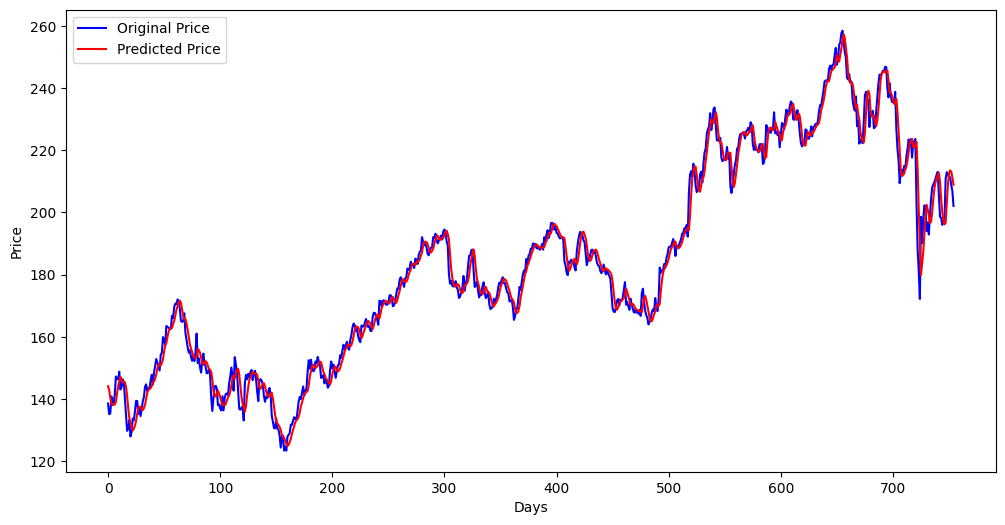

In [86]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend();

(140.0, 250.0)

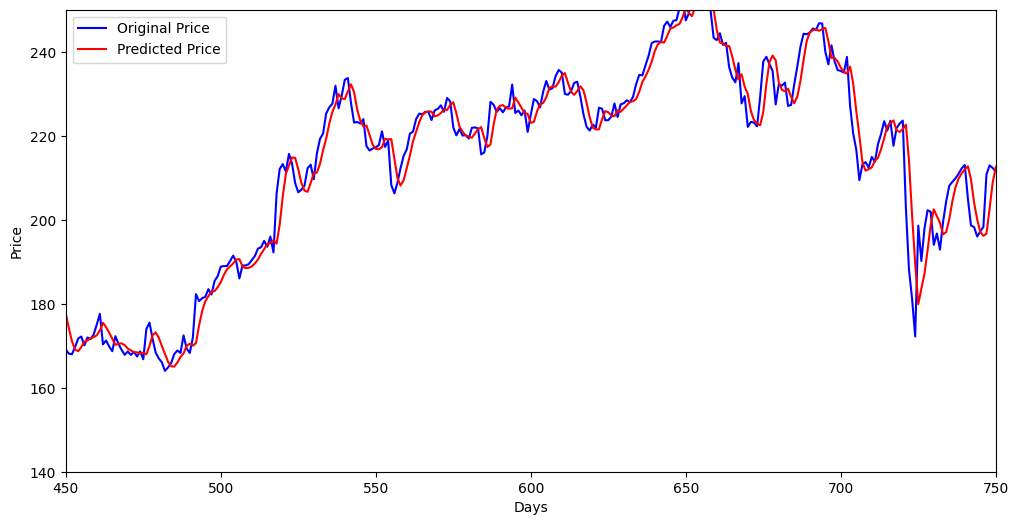

In [87]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
#Especificamos que porción de la gráfica queremos ver.
plt.xlim(450, 750)
plt.ylim(140, 250)

# 10. Model Evaluation

In [92]:
# Mean Squared Error (MSE) - Error cuadrático medio

from sklearn.metrics import mean_squared_error, r2_score

In [89]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 16.61971503517541


In [90]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 4.076728472093206


In [93]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-squared: {r2}")

R-squared: 0.9844828164843862
